

**ENTREGABLE II: PRIMERA ITERACION**

**Desarrollado por:** Diego Alejandro Salazar Blandon

**Materia:** Seminario

**Especialización en Analítica y Ciencia de Datos**

**Facultad de Ingeniería - Universidad de Antioquia**


**Predicción del bajo peso al nacer. Un estudio comparativo entre técnicas tradicionales de análisis y técnicas de Machine Learning.**

## 1. Librerias y configuraciones previas

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import spearmanr

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.decomposition import SparsePCA # PCA esparcido
from sklearn.decomposition import MiniBatchSparsePCA # Mini Batch PCA esparcido
from sklearn.utils.extmath import safe_sparse_dot # Producto punto entre matrices esparcidos para SparsePCA.
from sklearn.decomposition import IncrementalPCA # PCA incremental
from sklearn.decomposition import FastICA # Análisis de Componentes Independientes
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE # TSNE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
#import dmba as dm

from scipy.optimize import minimize # Librería que se utiliza para resolver el modelo de optimización. En este caso, se utiliza
                                    # la clase minimize para resolver el problema por minimización.
import random # para generar datos aleatorios de forma uniforme

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)

from sklearn.linear_model import LinearRegression # Algoritmo para crear el modelo de regresión lineal múltiple
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales
from sklearn.linear_model import RANSACRegressor # Se llama a una clase llamada RANSACRegressor para aplicar el método
                                                 # RANSAC o random sample consensus
from scipy.stats import linregress
from sklearn.feature_selection import r_regression # Selección de características para regresión basado en el coeficiente de correlación de Pearson
from sklearn.feature_selection import SelectKBest # Seleccionar las mejores características
from sklearn.feature_selection import mutual_info_regression # Selección de características para regresión basado en información mutua
from sklearn.utils.validation import column_or_1d

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV # Búsqueda de cuadrículas
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales

from sklearn.ensemble import VotingRegressor # Voto Mayoritario para Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize
    import math
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [3]:
# Función para contruir un modelo de regresión lineal por medio de statsmodels.api

def build_model(X,y):

    #A los datos de entrada 'X' se le adiciona una constante
    X = sm.add_constant(X)

    #Se crea y se entrena el modelo de regresion lineal q(statsmodels.api) con
    #los datos de entrada 'X' y los datos de salida 'y'
    lm = sm.OLS(y,X).fit()

    #imprime el resumen del modelo creado
    print(lm.summary()) # model summary

    return X

## 3. Descripción de la base de datos

**Name:** Natalidad

**Website:** http://medata.gov.co/dataset/nacimientos

**Description:**





**Output variable:**
1. Peso recien nacido

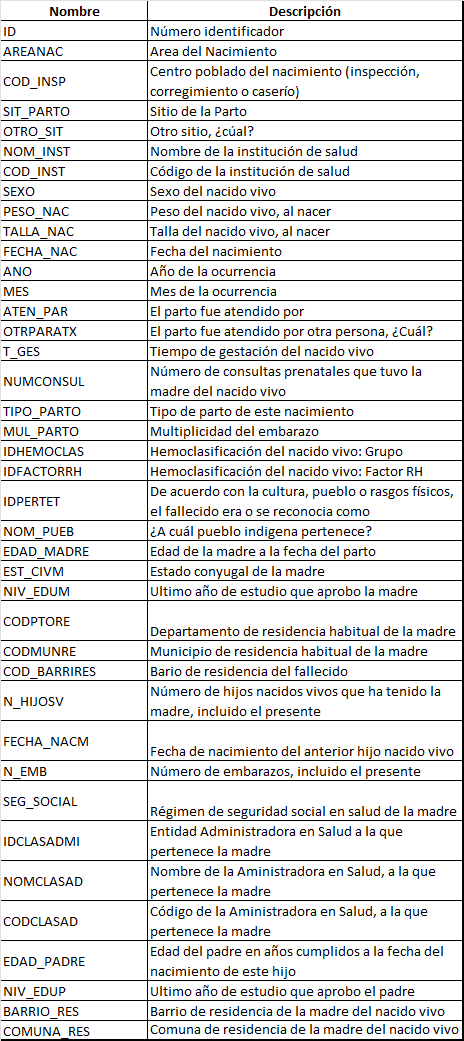

In [4]:
superc_url = 'http://medata.gov.co/sites/default/files/medata_harvest_files/natalidad.csv'

## 4. Exploración de Datos

In [5]:
d = pd.read_csv(superc_url, header=0, sep=';')
d.head()

<ipython-input-5-a4e2e516b5ab>:1: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv(superc_url, header=0, sep=';')


,ID,AREANAC,COD_INSP,SIT_PARTO,OTRO_SIT,NOM_INST,COD_INST,SEXO,PESO_NAC,TALLA_NAC,...,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,NOMCLASAD,CODCLASAD,EDAD_PADRE,NIV_EDUP,BARRIO_RES,COMUNA_RES
0,1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,50010212601.0,2,1070,38,...,20/03/1998,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,El Rincón,16 Belen
1,2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,50010464801.0,2,2900,47,...,01/01/1900,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,Versalles N.2,03 Manrique
2,3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,50010344803.0,2,2510,48,...,25/09/2011,2,5,NaN,NaN,NaN,34,8,Santa Mónica,12 La America
3,4,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,50010217804.0,1,3400,50,...,01/01/1900,1,5,NaN,NaN,NaN,24,99,Enciso,08 Villa Hermosa
4,5,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,50010217804.0,1,3760,53,...,06/08/1996,3,2,2.0,COMFAMA ANTIOQUIA- CAJA DE COMPENSACION FAMILI...,CCF002,41,2,San Diego,10 La Candelaria


## 5. Limpieza de datos (Data Cleaning)


En este aparatado se eliminan las variables que no aportan información al modelo como el identificador “ID” y identifican los valores perdidos.

In [6]:
#Borrando columnas que no se emplearán

d.drop([ 'ID', 'OTRO_SIT', 'COD_INSP', 'COD_INSP', 'NOM_INST', 'COD_INST', 'FECHA_NAC' , 'OTRPARATX', 'IDPERTET', 'NOM_PUEB',
'CODMUNRE', 'IDCLASADMI', 'NOMCLASAD', 'CODCLASAD','BARRIO_RES','COD_BARRIRES', "FECHA_NACM",'CODPTORE','ANO'], axis=1, inplace=True)


In [7]:

d.replace(["NaN",9,99,999,9999,98], np.nan, inplace=True)


In [8]:
d.describe()

,AREANAC,SIT_PARTO,SEXO,PESO_NAC,TALLA_NAC,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,...,IDHEMOCLAS,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP
count,272519.000000,272519.000000,272526.000000,272492.000000,272492.000000,247971.000000,272522.000000,272378.000000,236831.000000,272514.000000,...,269328.000000,269325.000000,272523.000000,269750.000000,228205.000000,272389.000000,272290.000000,272514.000000,262455.000000,201697.000000
mean,1.000910,1.003358,1.485686,3058.602018,49.073826,6.315630,1.011977,38.275305,7.052835,1.449537,...,2.330296,1.071542,25.802505,3.145587,4.397577,1.664994,1.841676,1.603180,29.469479,4.238367
std,0.041695,0.069700,0.499928,498.309780,2.775787,3.509302,0.234491,1.880866,2.687539,0.609231,...,0.927078,0.257728,6.433183,2.130575,1.861430,0.956992,1.137920,1.043729,7.395818,1.866873
min,1.000000,1.000000,1.000000,200.000000,19.000000,1.000000,1.000000,15.000000,0.000000,1.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000
25%,1.000000,1.000000,1.000000,2800.000000,48.000000,3.000000,1.000000,38.000000,6.000000,1.000000,...,1.000000,1.000000,21.000000,1.000000,3.000000,1.000000,1.000000,1.000000,24.000000,3.000000
50%,1.000000,1.000000,1.000000,3100.000000,49.000000,6.000000,1.000000,39.000000,7.000000,1.000000,...,3.000000,1.000000,25.000000,2.000000,4.000000,1.000000,2.000000,1.000000,29.000000,4.000000
75%,1.000000,1.000000,2.000000,3370.000000,51.000000,10.000000,1.000000,39.000000,8.000000,2.000000,...,3.000000,1.000000,30.000000,5.000000,4.000000,2.000000,2.000000,2.000000,34.000000,4.000000
max,3.000000,3.000000,3.000000,5480.000000,61.000000,12.000000,6.000000,43.000000,25.000000,4.000000,...,4.000000,2.000000,54.000000,6.000000,13.000000,20.000000,17.000000,5.000000,87.000000,13.000000


In [9]:
#Verificación y eliminación de registros duplicados


d.loc[d.duplicated()]

,AREANAC,SIT_PARTO,SEXO,PESO_NAC,TALLA_NAC,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,...,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,COMUNA_RES
27859,1.0,1.0,2,2260.0,44.0,1.0,1.0,37.0,10.0,2.0,...,2.0,33.0,5.0,NaN,1.0,1.0,1.0,34.0,NaN,15 Guayabal
28437,1.0,1.0,2,2980.0,50.0,1.0,1.0,38.0,12.0,1.0,...,1.0,14.0,5.0,3.0,1.0,1.0,1.0,16.0,NaN,15 Guayabal
28438,1.0,1.0,1,3130.0,55.0,1.0,1.0,41.0,10.0,1.0,...,1.0,27.0,6.0,7.0,2.0,2.0,1.0,26.0,4.0,60 Corregimiento de San Cristobal
28617,1.0,1.0,1,2830.0,49.0,1.0,1.0,36.0,NaN,1.0,...,1.0,22.0,1.0,7.0,1.0,2.0,1.0,28.0,4.0,16 Belen
28755,1.0,1.0,1,3200.0,52.0,1.0,1.0,39.0,8.0,1.0,...,1.0,28.0,1.0,7.0,1.0,1.0,1.0,30.0,7.0,03 Manrique
30181,1.0,1.0,1,3440.0,53.0,1.0,1.0,37.0,10.0,2.0,...,1.0,36.0,1.0,NaN,3.0,4.0,1.0,39.0,4.0,13 San Javier
34464,1.0,1.0,2,3400.0,51.0,3.0,1.0,39.0,11.0,1.0,...,1.0,31.0,6.0,7.0,1.0,1.0,1.0,33.0,4.0,60 Corregimiento de San Cristobal
39176,1.0,1.0,2,3020.0,49.0,6.0,1.0,39.0,7.0,1.0,...,1.0,33.0,2.0,7.0,1.0,1.0,1.0,37.0,4.0,07 Robledo
40618,1.0,1.0,1,3020.0,49.0,6.0,1.0,39.0,8.0,2.0,...,1.0,28.0,6.0,NaN,2.0,2.0,1.0,32.0,NaN,16 Belen
67626,1.0,1.0,1,3340.0,52.0,2.0,1.0,39.0,NaN,2.0,...,1.0,22.0,5.0,NaN,1.0,1.0,1.0,45.0,NaN,09 Buenos Aires


In [10]:
# eliminación de registros duplicados y atipicos
d = d.drop_duplicates()
d = d.dropna()
#Reiniciar el indice
d.reset_index(drop=True, inplace=True)



In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146814 entries, 0 to 146813
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   AREANAC     146814 non-null  float64
 1   SIT_PARTO   146814 non-null  float64
 2   SEXO        146814 non-null  int64  
 3   PESO_NAC    146814 non-null  float64
 4   TALLA_NAC   146814 non-null  float64
 5   MES         146814 non-null  float64
 6   ATEN_PAR    146814 non-null  float64
 7   T_GES       146814 non-null  float64
 8   NUMCONSUL   146814 non-null  float64
 9   TIPO_PARTO  146814 non-null  float64
 10  MUL_PARTO   146814 non-null  float64
 11  IDHEMOCLAS  146814 non-null  float64
 12  IDFACTORRH  146814 non-null  float64
 13  EDAD_MADRE  146814 non-null  float64
 14  EST_CIVM    146814 non-null  float64
 15  NIV_EDUM    146814 non-null  float64
 16  N_HIJOSV    146814 non-null  float64
 17  N_EMB       146814 non-null  float64
 18  SEG_SOCIAL  146814 non-null  float64
 19  ED

In [12]:
#asignan los tipos de variable segun su naturaleza
d['AREANAC'] = d['AREANAC'].astype('category')
d['SIT_PARTO'] = d['SIT_PARTO'].astype('category')
d['SEXO'] = d['SEXO'].astype('category')
#d['ANO'] = d['ANO'].astype('category')
d['ATEN_PAR'] = d['ATEN_PAR'].astype('category')
d['TIPO_PARTO'] = d['TIPO_PARTO'].astype('category')
d['MUL_PARTO'] = d['MUL_PARTO'].astype('category')
d['IDHEMOCLAS'] = d['IDHEMOCLAS'].astype('category')
d['NIV_EDUM'] = d['NIV_EDUM'].astype('category')
d['IDFACTORRH'] = d['IDFACTORRH'].astype('category')
d['SEG_SOCIAL'] = d['SEG_SOCIAL'].astype('category')
d['NIV_EDUP'] = d['NIV_EDUP'].astype('category')
d['EST_CIVM'] = d['EST_CIVM'].astype('category')



In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146814 entries, 0 to 146813
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   AREANAC     146814 non-null  category
 1   SIT_PARTO   146814 non-null  category
 2   SEXO        146814 non-null  category
 3   PESO_NAC    146814 non-null  float64 
 4   TALLA_NAC   146814 non-null  float64 
 5   MES         146814 non-null  float64 
 6   ATEN_PAR    146814 non-null  category
 7   T_GES       146814 non-null  float64 
 8   NUMCONSUL   146814 non-null  float64 
 9   TIPO_PARTO  146814 non-null  category
 10  MUL_PARTO   146814 non-null  category
 11  IDHEMOCLAS  146814 non-null  category
 12  IDFACTORRH  146814 non-null  category
 13  EDAD_MADRE  146814 non-null  float64 
 14  EST_CIVM    146814 non-null  category
 15  NIV_EDUM    146814 non-null  category
 16  N_HIJOSV    146814 non-null  float64 
 17  N_EMB       146814 non-null  float64 
 18  SEG_SOCIAL  146814 non-n

In [14]:
d.head()

,AREANAC,SIT_PARTO,SEXO,PESO_NAC,TALLA_NAC,MES,ATEN_PAR,T_GES,NUMCONSUL,TIPO_PARTO,...,IDFACTORRH,EDAD_MADRE,EST_CIVM,NIV_EDUM,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,COMUNA_RES
0,1.0,1.0,2,1070.0,38.0,4.0,1.0,30.0,8.0,2.0,...,1.0,39.0,6.0,4.0,3.0,4.0,1.0,42.0,4.0,16 Belen
1,1.0,1.0,2,2510.0,48.0,6.0,1.0,36.0,7.0,1.0,...,1.0,37.0,6.0,8.0,2.0,2.0,5.0,34.0,8.0,12 La America
2,1.0,1.0,1,3760.0,53.0,4.0,1.0,39.0,8.0,1.0,...,1.0,40.0,1.0,3.0,3.0,3.0,2.0,41.0,2.0,10 La Candelaria
3,1.0,1.0,1,3405.0,49.0,3.0,1.0,38.0,10.0,2.0,...,1.0,37.0,6.0,4.0,1.0,1.0,2.0,43.0,2.0,06 Doce De Octubre
4,1.0,1.0,1,3900.0,52.0,10.0,1.0,39.0,6.0,2.0,...,1.0,18.0,2.0,3.0,1.0,2.0,5.0,23.0,2.0,09 Buenos Aires


En este punto que al interior de las variables categóricas se tienen códigos que no se reportan en la fuente de los datos. Al indagar con una enfermera del área de pediatría identifica que las variables publicadas hacen del registro del certificado de nacido vivo, que se le debe diligenciar a todo recién nacido. Por lo que se procede a codificar las variables según este formato.

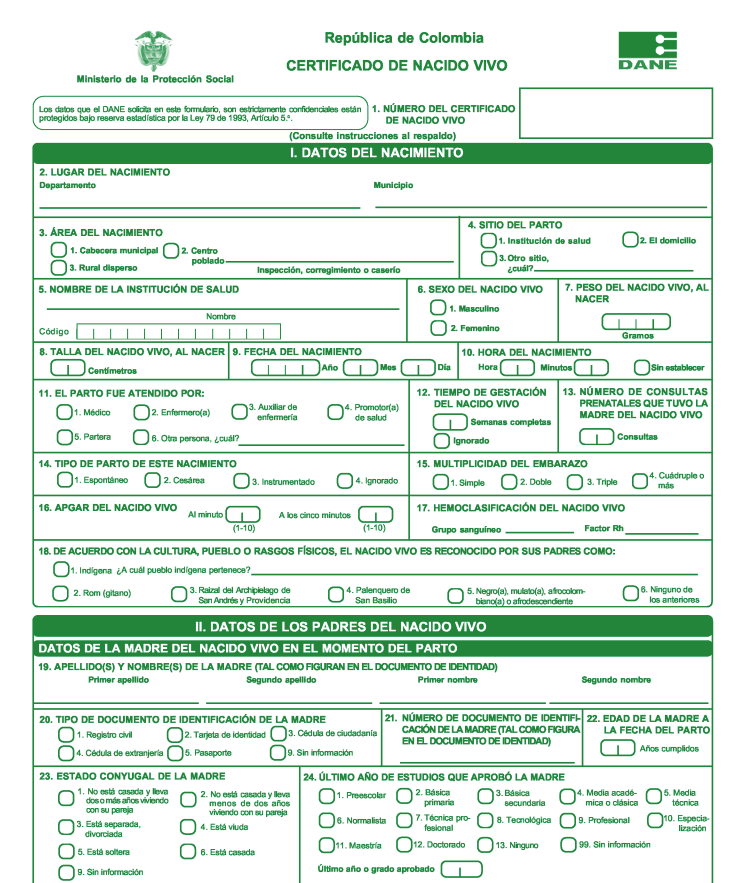

In [15]:
#Se reemplazan codigos numericos por categoria en cada variable

#Area nacido
areareemplazos={1.0:'Cabecera municipal',2.0:'Centro Poblado',3.0:'Rural disperso'}
for numero, valor in areareemplazos.items():
 d['AREANAC'] = d['AREANAC'].replace(numero, valor)

#Sitio del parto
sitioreemplazos={1.0:'Institución de salud',2.0:'El domicilio',3.0:'Otro'}
for numero, valor in sitioreemplazos.items():
 d['SIT_PARTO'] = d['SIT_PARTO'].replace(numero, valor)

#sexo
sexoreemplazos={1.0:'Masculino',2.0:'Femenino'}
for numero, valor in sexoreemplazos.items():
 d['SEXO'] = d['SEXO'].replace(numero, valor)

#El parto fue atendido por
partoreemplazos={1.0:'Medico',2.0:'Enfermero(a)', 3.0:'Auxiliar de enfermeria', 4.0:'Promotor(a) de salud',5.0:'Partera',6.0:'Otro'}
for numero, valor in partoreemplazos.items():
 d['ATEN_PAR'] = d['ATEN_PAR'].replace(numero, valor)

#tipo parto
tiporeemplazos={1.0:'Espontáneo',2.0:'Cesária',3.0:'Instrumentado',4.0:'Ignorado'}
for numero, valor in tiporeemplazos.items():
 d['TIPO_PARTO'] = d['TIPO_PARTO'].replace(numero, valor)

#Multiplicidad de embarazo
mulreemplazos={1.0:'simple',2.0:'Doble',3.0:'Triple',4.0:'Cuadruple o más'}
for numero, valor in mulreemplazos.items():
 d['MUL_PARTO'] = d['MUL_PARTO'].replace(numero, valor)

#Grupo Sanguineo
gruporeemplazos={1.0:'A',2.0:'B',3.0:'O',4.0:'AB'}
for numero, valor in gruporeemplazos.items():
 d['IDHEMOCLAS'] = d['IDHEMOCLAS'].replace(numero, valor)

#RH
rhreemplazos={1.0:'Positivo',2.0:'Negativo'}
for numero, valor in rhreemplazos.items():
 d['IDFACTORRH'] = d['IDFACTORRH'].replace(numero, valor)


#Ultimo año aprobado de la madre
ultimoreemplazos={1.0:'Prescolar',2.0:'Primaria', 3.0:'Secundaria', 4.0:'Media academica',5.0:'Media técnica',6.0:'Normalista', 7.0:'Técnica profesional',\
                  8.0:'Tecnológica',9.0:'Profesional',10.0:'Especializacion',11.0:'Maestria',12.0:'Doctorato',13.0:'Ninguana'}
for numero, valor in ultimoreemplazos.items():
 d['NIV_EDUM'] = d['NIV_EDUM'].replace(numero, valor)

 #Seguridad Social
segreemplazos={1.0:'contributivo',2.0:'Subsidiado',3.0:'Excepción',4.0:'Especial',5.0:'No asegurado'}
for numero, valor in segreemplazos.items():
 d['SEG_SOCIAL'] = d['SEG_SOCIAL'].replace(numero, valor)


#Estado conyugal madre
estadoreemplazos={1.0:'No  casada y pareja > 2años ',2.0:'No casada y pareja < 2años', 3.0:'Separada, divorciada', 4.0:'Viuda',5.0:'Soltera',6.0:'Casada'}
for numero, valor in estadoreemplazos.items():
 d['EST_CIVM'] = d['EST_CIVM'].replace(numero, valor)


#Ultimo año aprobado del padre
ultimoreemplazos={1.0:'Prescolar',2.0:'Primaria', 3.0:'Secundaria', 4.0:'Media academica',5.0:'Media técnica',6.0:'Normalista', 7.0:'Técnica profesional',\
                  8.0:'Tecnológica',9.0:'Profesional',10.0:'Especializacion',11.0:'Maestria',12.0:'Doctorato',13.0:'Ninguana'}
for numero, valor in ultimoreemplazos.items():
 d['NIV_EDUP'] = d['NIV_EDUP'].replace(numero, valor)



## 6. Visualización de datos

### Variables de entrada

En las variables de entrada para su mejor visualización y tratamiento se separan en dos grupos según su naturaleza cualitativa o cuantitativa.

In [16]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,AREANAC,SIT_PARTO,SEXO,ATEN_PAR,TIPO_PARTO,MUL_PARTO,IDHEMOCLAS,IDFACTORRH,EST_CIVM,NIV_EDUM,SEG_SOCIAL,NIV_EDUP,COMUNA_RES
0,Cabecera municipal,Institución de salud,Femenino,Medico,Cesária,simple,B,Positivo,Casada,Media academica,contributivo,Media academica,16 Belen
1,Cabecera municipal,Institución de salud,Femenino,Medico,Espontáneo,simple,O,Positivo,Casada,Tecnológica,No asegurado,Tecnológica,12 La America
2,Cabecera municipal,Institución de salud,Masculino,Medico,Espontáneo,simple,A,Positivo,No casada y pareja > 2años,Secundaria,Subsidiado,Primaria,10 La Candelaria
3,Cabecera municipal,Institución de salud,Masculino,Medico,Cesária,simple,O,Positivo,Casada,Media academica,Subsidiado,Primaria,06 Doce De Octubre
4,Cabecera municipal,Institución de salud,Masculino,Medico,Cesária,simple,A,Positivo,No casada y pareja < 2años,Secundaria,No asegurado,Primaria,09 Buenos Aires


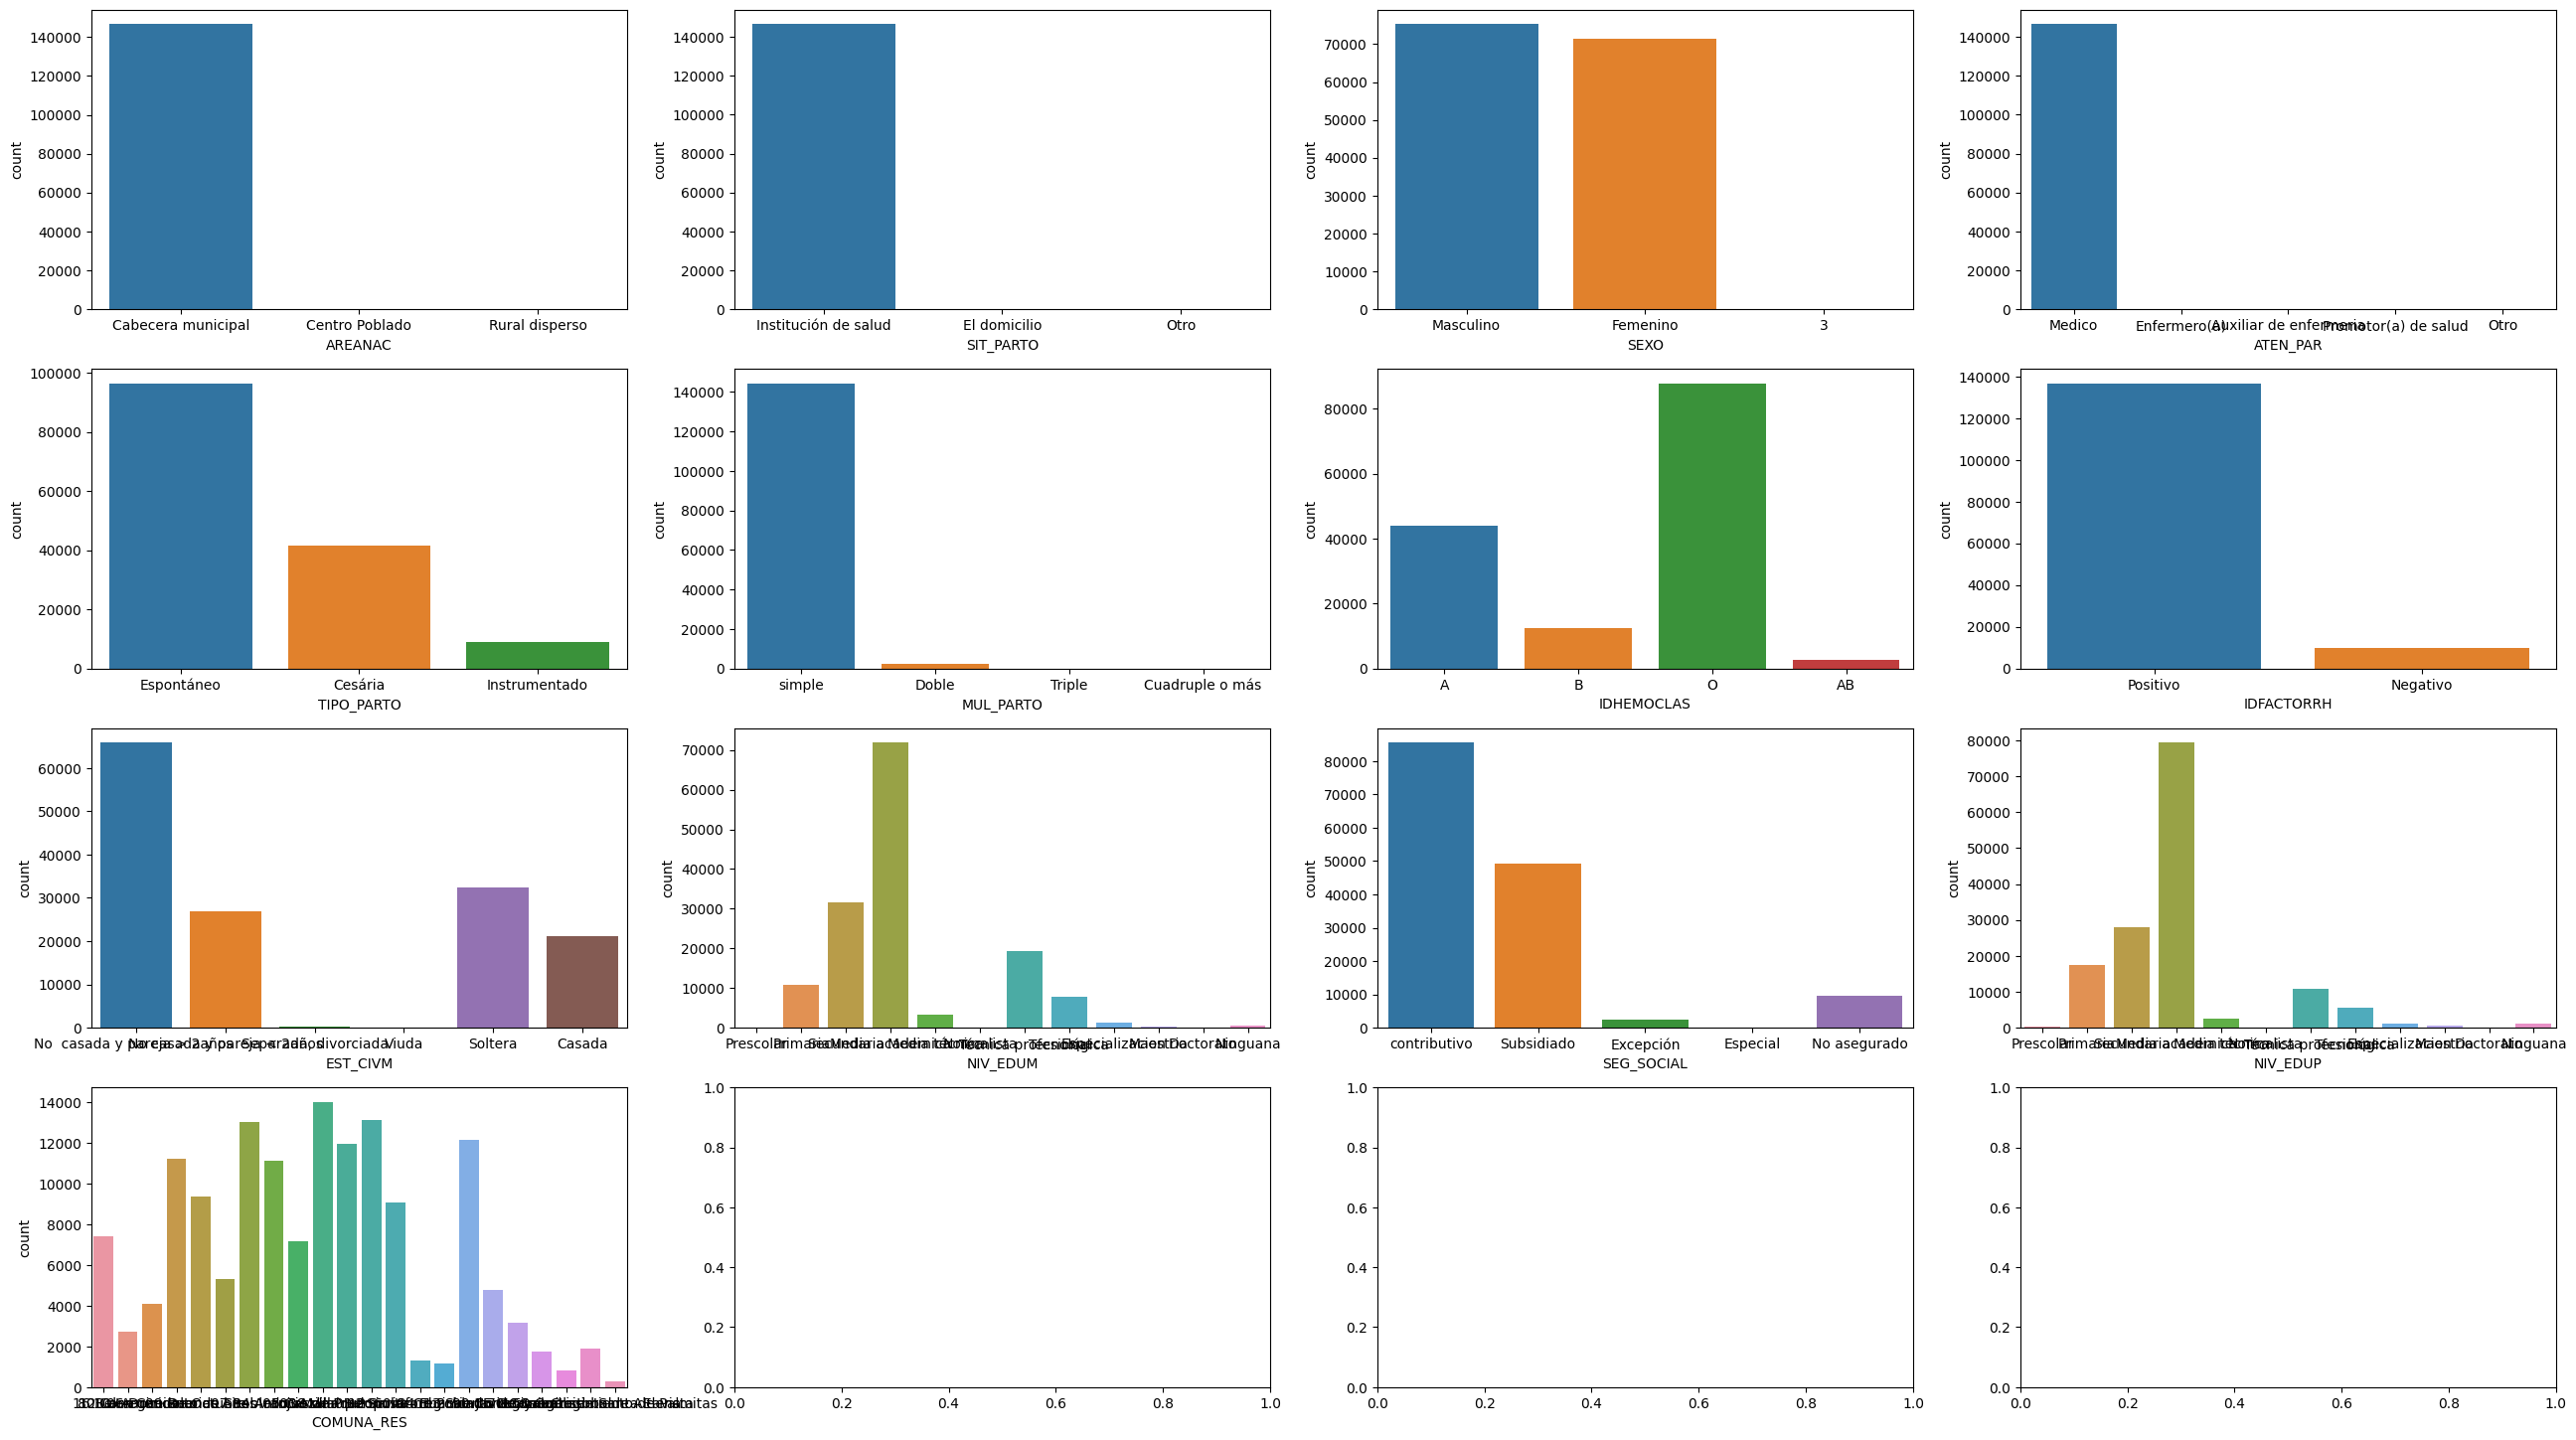

In [17]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 4,4, 'c', None, (32,18))

In [18]:
for col in d[catCols].columns:
    print("="*5 + f" {col} " + "="*20)
    print(d[catCols][col].value_counts())
    print()

===== AREANAC ====================
Cabecera municipal    146761
Rural disperso            43
Centro Poblado            10
Name: AREANAC, dtype: int64

===== SIT_PARTO ====================
Institución de salud    146757
El domicilio                34
Otro                        23
Name: SIT_PARTO, dtype: int64

===== SEXO ====================
Masculino    75344
Femenino     71458
3               12
Name: SEXO, dtype: int64

===== ATEN_PAR ====================
Medico                    146699
Enfermero(a)                  77
Auxiliar de enfermeria        30
Promotor(a) de salud           5
Otro                           3
Name: ATEN_PAR, dtype: int64

===== TIPO_PARTO ====================
Espontáneo       96434
Cesária          41604
Instrumentado     8776
Name: TIPO_PARTO, dtype: int64

===== MUL_PARTO ====================
simple             144348
Doble                2426
Triple                 35
Cuadruple o más         5
Name: MUL_PARTO, dtype: int64

===== IDHEMOCLAS ==============

In [19]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,PESO_NAC,TALLA_NAC,MES,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE
0,1070.0,38.0,4.0,30.0,8.0,39.0,3.0,4.0,42.0
1,2510.0,48.0,6.0,36.0,7.0,37.0,2.0,2.0,34.0
2,3760.0,53.0,4.0,39.0,8.0,40.0,3.0,3.0,41.0
3,3405.0,49.0,3.0,38.0,10.0,37.0,1.0,1.0,43.0
4,3900.0,52.0,10.0,39.0,6.0,18.0,1.0,2.0,23.0


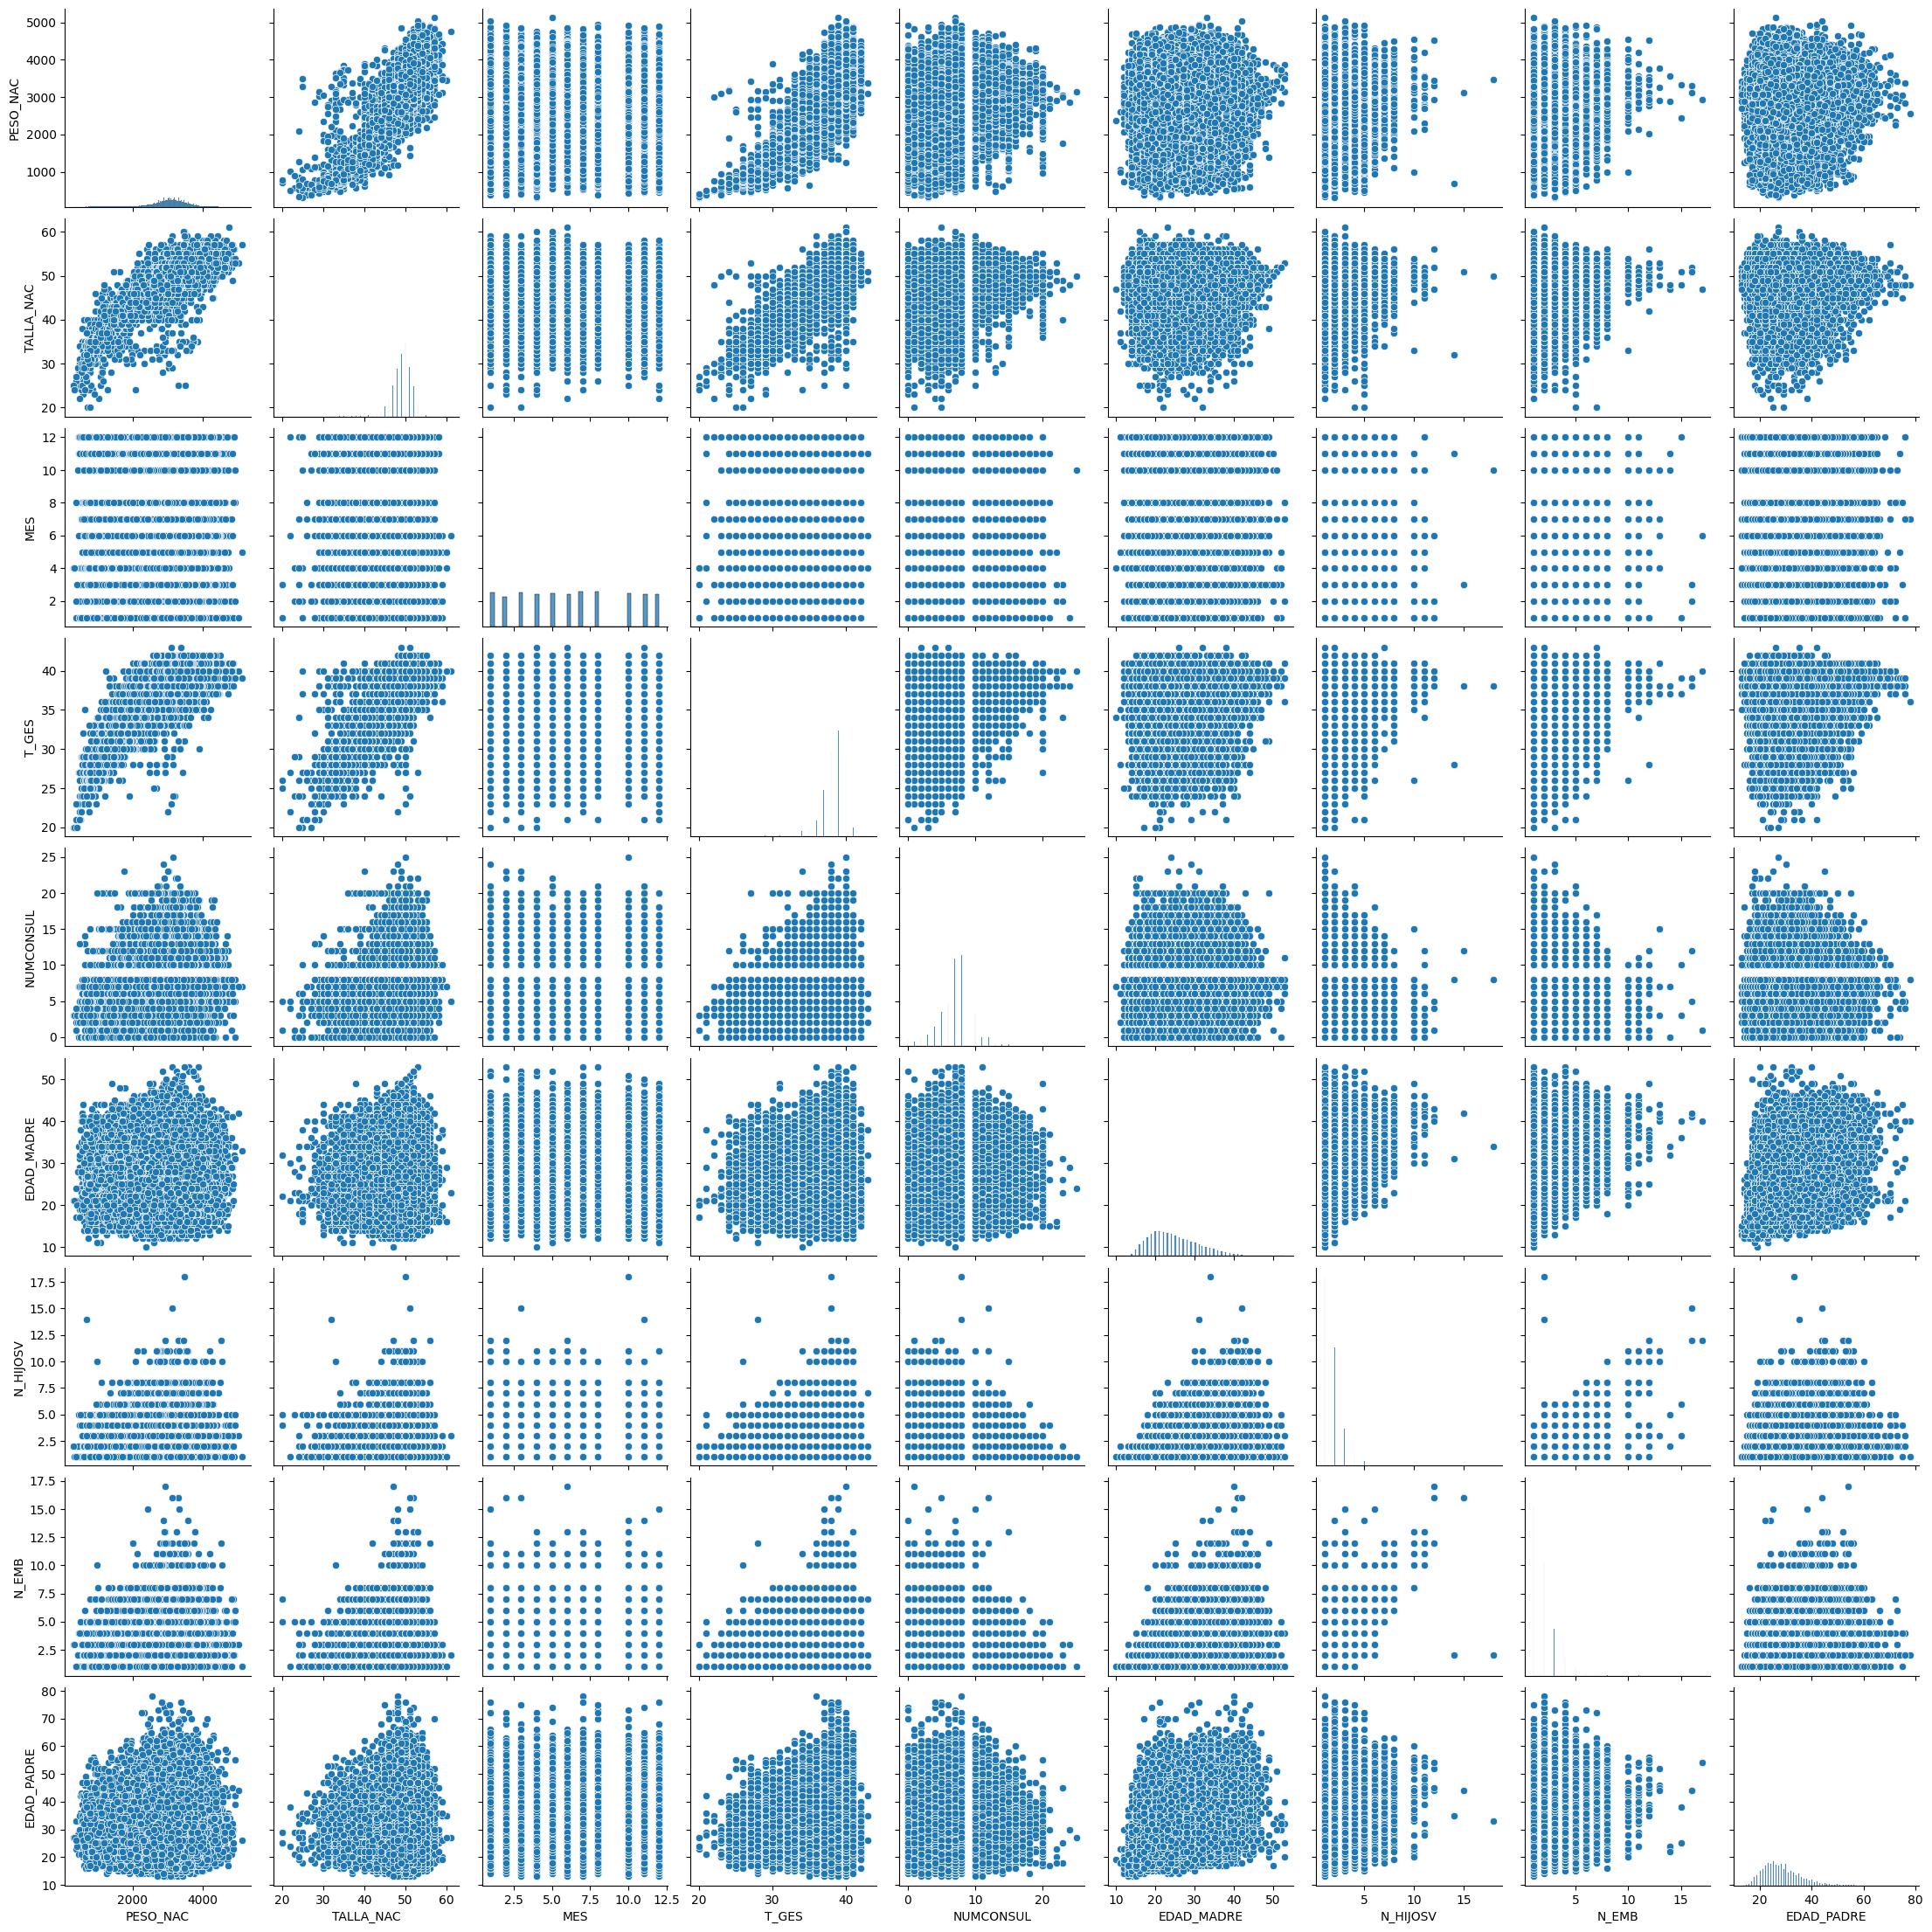

In [20]:
sns.pairplot(d[numCols])
plt.show()

### Variable de salida

<ipython-input-21-70abb66cdf86>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['PESO_NAC'])


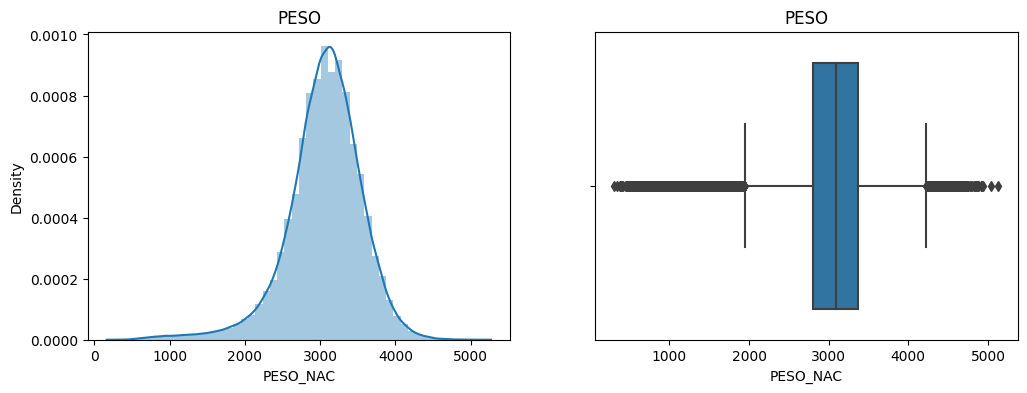

In [21]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('PESO')
sns.distplot(d['PESO_NAC'])

plt.subplot(1,2,2)
plt.title('PESO')
sns.boxplot(x=d['PESO_NAC'])

plt.show()

In [22]:
#Descripción del precio de los vehículos: Total, media, desviación, mínimo, máximo y percentiles

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(d['PESO_NAC'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count   146814
mean      3053
std        501
min        305
25%       2800
50%       3090
75%       3370
85%       3520
90%       3620
95%       3783
97.5%     3920
100%      5130
max       5130
Name: PESO_NAC, dtype: float64


In [23]:
# Exportamos el dataframe a un archivo CSV
d.to_csv('Nacimientosdiego.csv', index=False)

### 7. Preparación de datos

### Imputaciones

In [24]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

PESO_NAC 0
TALLA_NAC 0
MES 0
T_GES 0
NUMCONSUL 0
EDAD_MADRE 0
N_HIJOSV 0
N_EMB 0
EDAD_PADRE 0


In [25]:
#verificación de la imputación: No existen valores nulos
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

AREANAC 0
SIT_PARTO 0
SEXO 0
PESO_NAC 0
TALLA_NAC 0
MES 0
ATEN_PAR 0
T_GES 0
NUMCONSUL 0
TIPO_PARTO 0
MUL_PARTO 0
IDHEMOCLAS 0
IDFACTORRH 0
EDAD_MADRE 0
EST_CIVM 0
NIV_EDUM 0
N_HIJOSV 0
N_EMB 0
SEG_SOCIAL 0
EDAD_PADRE 0
NIV_EDUP 0
COMUNA_RES 0


### Valores atípicos para las variables de entrada

In [26]:
#utilización de LocalOutlierFactor con 14 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=14
#lof = LocalOutlierFactor(n_neighbors=14, contamination=0.1)

# identificar los valires atípicos por medio de lof
#y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
#outliers = y_pred == -1

#print('Indices de valores atípicos: ', d[outliers].index.tolist())


In [27]:
# Eliminar los valores atípicos del dataframe original
#d = d.loc[~outliers]

In [28]:
# Preparación de datos
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Modelado
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor


# Evaluación de modelos
# ==============================================================================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Creación de Variables Dummies

In [29]:
# Aplicación de la función de get_dummies

df =pd.get_dummies(d, drop_first=1)

### Dividir el conjunto de datos

In [30]:
#Se crea una lista con todas las varibles de entrada

vDep = list(df.columns)
vDep.remove('PESO_NAC')

print(vDep)

['TALLA_NAC', 'MES', 'T_GES', 'NUMCONSUL', 'EDAD_MADRE', 'N_HIJOSV', 'N_EMB', 'EDAD_PADRE', 'AREANAC_Centro Poblado', 'AREANAC_Rural disperso', 'SIT_PARTO_El domicilio', 'SIT_PARTO_Otro', 'SEXO_Femenino', 'SEXO_3', 'ATEN_PAR_Enfermero(a)', 'ATEN_PAR_Auxiliar de enfermeria', 'ATEN_PAR_Promotor(a) de salud', 'ATEN_PAR_Otro', 'TIPO_PARTO_Cesária', 'TIPO_PARTO_Instrumentado', 'MUL_PARTO_Doble', 'MUL_PARTO_Triple', 'MUL_PARTO_Cuadruple o más', 'IDHEMOCLAS_B', 'IDHEMOCLAS_O', 'IDHEMOCLAS_AB', 'IDFACTORRH_Negativo', 'EST_CIVM_No casada y pareja < 2años', 'EST_CIVM_Separada, divorciada', 'EST_CIVM_Viuda', 'EST_CIVM_Soltera', 'EST_CIVM_Casada', 'NIV_EDUM_Primaria', 'NIV_EDUM_Secundaria', 'NIV_EDUM_Media academica', 'NIV_EDUM_Media técnica', 'NIV_EDUM_Normalista', 'NIV_EDUM_Técnica profesional', 'NIV_EDUM_Tecnológica', 'NIV_EDUM_Especializacion', 'NIV_EDUM_Maestria', 'NIV_EDUM_Doctorato', 'NIV_EDUM_Ninguana', 'SEG_SOCIAL_Subsidiado', 'SEG_SOCIAL_Excepción', 'SEG_SOCIAL_Especial', 'SEG_SOCIAL_No 

In [31]:
#Se elimina el elemento Peso de la lista de variables numéricas

numCols.remove('PESO_NAC')

In [32]:
# División de los datos en train y test


# Se establecen los dataframes de con las variables de entrada X y la variable de salida y
X = df[vDep]
y = df['PESO_NAC']

In [33]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [34]:
#Escalar Variables

# Se establece la configuración para que los valores numéricos se vean con 4 decimales
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_test[numCols] = scaler.fit_transform(X_test[numCols])

X_train.head()

,TALLA_NAC,MES,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE,AREANAC_Centro Poblado,AREANAC_Rural disperso,...,COMUNA_RES_13 San Javier,COMUNA_RES_14 El Poblado,COMUNA_RES_15 Guayabal,COMUNA_RES_16 Belen,COMUNA_RES_50 Corregimiento de Palmitas,COMUNA_RES_60 Corregimiento de San Cristobal,COMUNA_RES_70 Corregimiento de Altavista,COMUNA_RES_80 Corregimiento de San Antonio de Prado,COMUNA_RES_90 Corregimiento de Santa Elena,COMUNA_RES_Sin informacion
4867,0.7561,0.2727,0.7826,0.2800,0.5238,0.2857,0.3333,0.5538,0,0,...,0,0,0,0,0,0,0,0,0,0
54079,0.7561,0.5455,0.8696,0.2400,0.2381,0.0000,0.0000,0.2308,0,0,...,0,0,0,0,0,0,0,0,0,0
59922,0.7317,0.6364,0.8261,0.4000,0.1429,0.0000,0.0000,0.2462,0,0,...,0,0,0,0,0,0,0,0,0,0
95187,0.6585,0.4545,0.7391,0.2400,0.6905,0.0714,0.2000,0.2615,0,0,...,0,0,0,0,0,0,0,0,0,0
72555,0.7073,0.9091,0.8261,0.2800,0.1905,0.0000,0.0667,0.1538,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Creación de un Modelo de Regresion Tradicional

In [35]:
#Llamamos la funcion build_model definida al principio de este notebook que crea y entrena el modelo

modelo_X_train = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2795.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:50:03   Log-Likelihood:            -7.2549e+05
No. Observations:              102769   AIC:                         1.451e+06
Df Residuals:                  102689   BIC:                         1.452e+06
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

## 8. Creacion de Modelo de Regresion mejorados con tecnicas de Machine learning en la estimacion de parametros

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import LocalOutlierFactor

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import spearmanr

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA # Análisis de Componentes Principales
from sklearn.decomposition import KernelPCA # Kernel PCA
from sklearn.decomposition import SparsePCA # PCA esparcido
from sklearn.decomposition import MiniBatchSparsePCA # Mini Batch PCA esparcido
from sklearn.utils.extmath import safe_sparse_dot # Producto punto entre matrices esparcidos para SparsePCA.
from sklearn.decomposition import IncrementalPCA # PCA incremental
from sklearn.decomposition import FastICA # Análisis de Componentes Independientes
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection, SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE # TSNE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
#import dmba as dm

from scipy.optimize import minimize # Librería que se utiliza para resolver el modelo de optimización. En este caso, se utiliza
                                    # la clase minimize para resolver el problema por minimización.
import random # para generar datos aleatorios de forma uniforme

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)

from sklearn.linear_model import LinearRegression # Algoritmo para crear el modelo de regresión lineal múltiple
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales
from sklearn.linear_model import RANSACRegressor # Se llama a una clase llamada RANSACRegressor para aplicar el método
                                                 # RANSAC o random sample consensus
from scipy.stats import linregress
from sklearn.feature_selection import r_regression # Selección de características para regresión basado en el coeficiente de correlación de Pearson
from sklearn.feature_selection import SelectKBest # Seleccionar las mejores características
from sklearn.feature_selection import mutual_info_regression # Selección de características para regresión basado en información mutua
from sklearn.utils.validation import column_or_1d

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV # Búsqueda de cuadrículas
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales

from sklearn.ensemble import VotingRegressor # Voto Mayoritario para Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [37]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

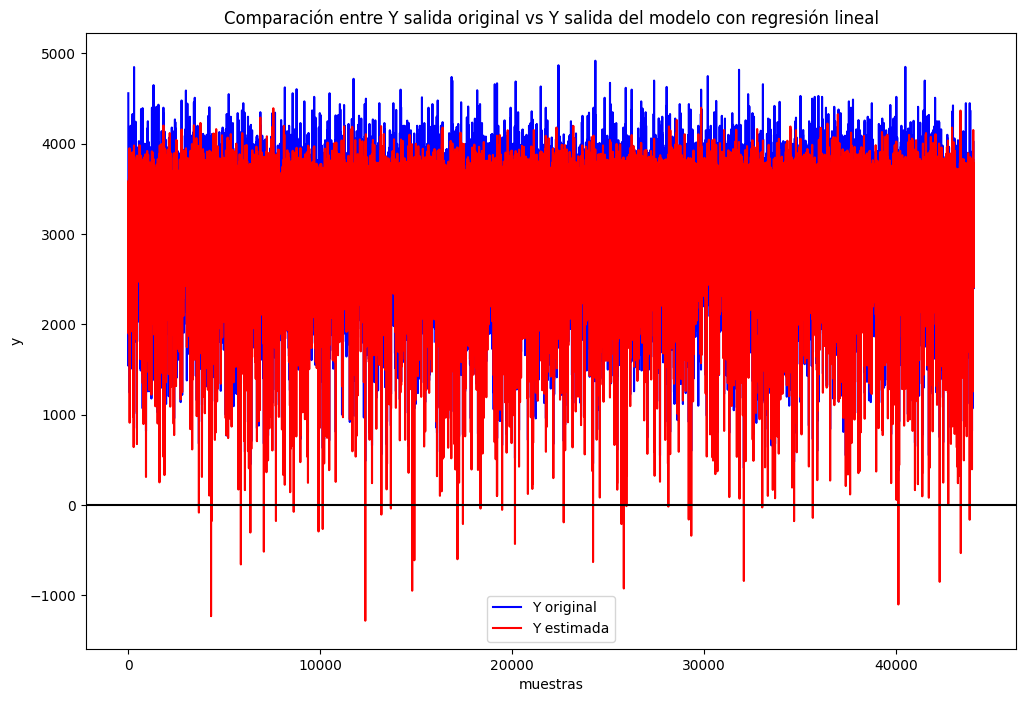

In [38]:
Y_pred = LR.predict(X_test) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(y_test)), y_test,
                  color = 'b', label='Y original')
line_2 = plt.plot(np.arange(len(y_test)), Y_pred,
                  color = 'r', label='Y estimada')
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [39]:
Puntaje_1 = LR.score(X_test, y_test) # Validación por puntaje o score
Validacion = cross_val_score(LR, X_test,
                             y_test, cv = 5,
                             scoring = 'r2') #mejor estimacion del modelo de regresion lineal
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el r2
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.6434
Media = 0.6836
Desviación Estándar = 0.006350083522877


## 9. Árboles de Decisión Random Forest (Regresión)

###Librerias y configuraciones previas


In [40]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================

#creación de modelos
from sklearn.ensemble import RandomForestRegressor


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#import statsmodels.api as sm
import math

#evaluacion de variables
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Creación del modelo

Un Random Forest es un metaestimador que ajusta una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

**Parametros:**
- **n_estimators:** (default=100) número de árboles del bosque
- **max_depth:** (default=None) La profundidad máxima del árbol. Si es `None`, los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos ejemplos del parametro min_samples_split.
- **max_features:** (default=1.0) El número de características a considerar al buscar la mejor división
    - auto, None o 1.0: max_features=n_features.
    - sqrt: max_features=sqrt(n_features).
    - log2: max_features=log2(n_features).

- **bootstrap:**(default=True) Si se utilizan muestras al construir árboles. Si es False, se usa todo el conjunto de datos para construir cada árbol.

- **oob_score:** (default=False) si usa ejemplos out-of-bag para estimar un score de generalización. Solo disponible si bootstrap = True.

In [41]:
# Creación del modelo
# ==============================================================================
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'friedman_mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 123
         )


# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      n_estimators=10, n_jobs=-1, random_state=123)

### Evaluación del modelo

#### Error Cuadráico Medio (rmse) y el Coeficiente de Determinación $R^2$

In [42]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 320.5538475596141
El error (r2) de test es: 0.5950254993443636


##  Afinando el modelo (tuning)

Valor óptimo de n_estimators(árboles): 146


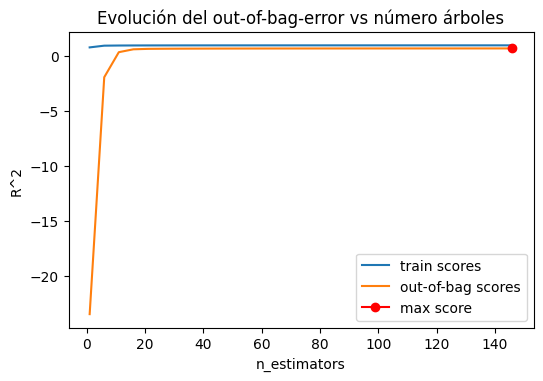

In [43]:
# Validación empleando el Out-of-Bag error : (tiempo de ejecucion colab 42 minutos)

# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.

for n_estimators in estimator_range:

    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'friedman_mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)



# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators(árboles): {estimator_range[np.argmax(oob_scores)]}")

Valor óptimo de n_estimators: 146


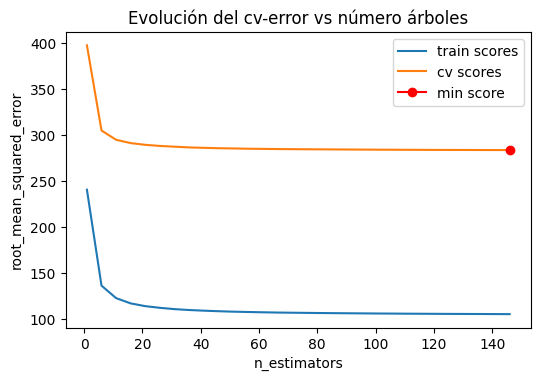

In [44]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error (tiempo de ejecucion colab 3 horas)
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:

    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error', #mean squared error: mse
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

**Analísis:** Ambas métricas indican que, a partir de 20 árboles (n_estimators), el error de validación del modelo se estabiliza.

Valor óptimo de max_features: 18


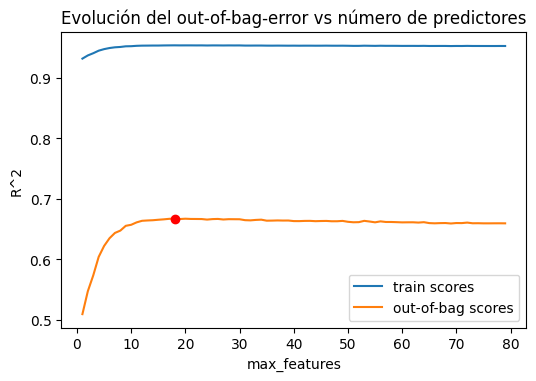

In [45]:
# Validación empleando el Out-of-Bag error (tiempo de ejecucion colab 39 minutos)
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1) #X_train.shape[1] = total de características


# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 40,
                criterion    = 'friedman_mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

Valor óptimo de max_features: 20


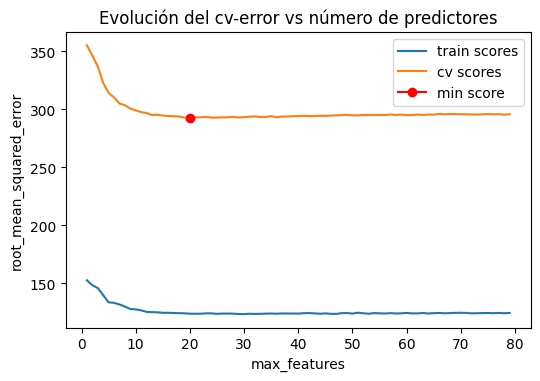

In [46]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error (tiempo de ejecucion colab 54 minutos)
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:

    modelo = RandomForestRegressor(
                n_estimators = 10,
                criterion    = 'friedman_mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )

    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

**Analísis:** Ambas métricas indican que, entre 9 y 15 características se obtiene el mejor R^2 y el menor error

In [47]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [15],
                 'max_features': [9, 11, 13, 15],
                 'max_depth'   : [3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:

    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(X_train, y_train)

    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(5)

Modelo: {'max_depth': 3, 'max_features': 9, 'n_estimators': 15} ✓
Modelo: {'max_depth': 3, 'max_features': 11, 'n_estimators': 15} ✓
Modelo: {'max_depth': 3, 'max_features': 13, 'n_estimators': 15} ✓
Modelo: {'max_depth': 3, 'max_features': 15, 'n_estimators': 15} ✓
Modelo: {'max_depth': 10, 'max_features': 9, 'n_estimators': 15} ✓
Modelo: {'max_depth': 10, 'max_features': 11, 'n_estimators': 15} ✓
Modelo: {'max_depth': 10, 'max_features': 13, 'n_estimators': 15} ✓
Modelo: {'max_depth': 10, 'max_features': 15, 'n_estimators': 15} ✓
Modelo: {'max_depth': 20, 'max_features': 9, 'n_estimators': 15} ✓
Modelo: {'max_depth': 20, 'max_features': 11, 'n_estimators': 15} ✓
Modelo: {'max_depth': 20, 'max_features': 13, 'n_estimators': 15} ✓
Modelo: {'max_depth': 20, 'max_features': 15, 'n_estimators': 15} ✓


,oob_r2,max_depth,max_features,n_estimators
11,0.6074,20,15,15
10,0.6056,20,13,15
7,0.6018,10,15,15
9,0.5943,20,11,15
8,0.5873,20,9,15


In [48]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,:]['oob_r2'], "R2")

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
0.6074046797316617 R2


**Analísis:** Con 15 Características, y un maximo nivel de profundidad de 10 se obtiene el mejor R^2 sobre el datatset Out of bag

#### Validación Cruzada

In [49]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [15],
              'max_features': [9, 11, 13, 15],
              'max_depth'   : [ 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = 5,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
11,20,15,15,-283.5479,0.9307,-201.5091,1.7156
10,20,13,15,-284.7112,1.0167,-206.2786,0.6981
9,20,11,15,-287.1566,1.4251,-215.1725,0.8386
7,10,15,15,-289.0631,1.9477,-282.6828,1.8657


In [50]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 20, 'max_features': 15, 'n_estimators': 15} : -283.54793626631954 neg_root_mean_squared_error


In [51]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

r2 = r2_score(y_test, predicciones)
print(f"El error (r2) de test es: {r2}")

El error (rmse) de test es: 303.57118299643776
El error (r2) de test es: 0.6367992165610223


#### Referencias


- Random Forest
    - https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
    - https://fhernanb.github.io/libro_mod_pred/rand-forests.html
    - https://scikit-learn.org/stable/modules/model_evaluation.html
